In [3]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")
tips = sns.load_dataset("tips")

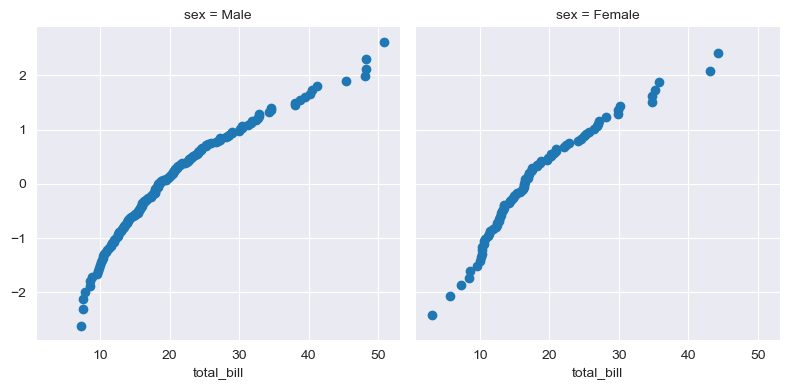

In [4]:
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill")

이변량 플롯을 만들고 싶다면 x축 변수를 먼저 받고 y축 변수를 두 번째로 받도록 함수를 작성해야 합니다.

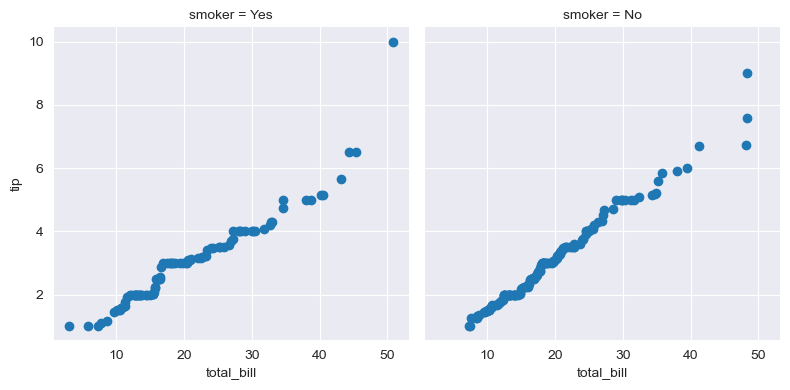

In [5]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip")

matplotlib.pyplot.scatter()키워드 인수를 수락 color하고 label올바른 작업을 수행하기 때문에 어려움 없이 색조 패싯을 추가할 수 있습니다.

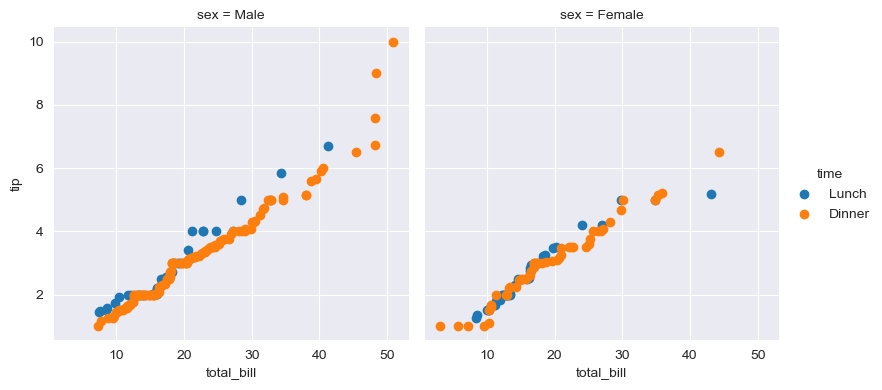

In [6]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()

그러나 경우에 따라 및 키워드 인수 를 사용하여 예상한 대로 작동하지 않는 함수를 매핑해야 할 수도 있습니다. 이 경우 사용자 지정 함수의 논리에서 명시적으로 포착하고 처리할 수 있습니다. 예를 들어 이 접근 방식을 사용하면 map 을 사용할 수 있지만 matplotlib.pyplot.hexbin()그렇지 않으면 API와 잘 작동하지 않습니다 



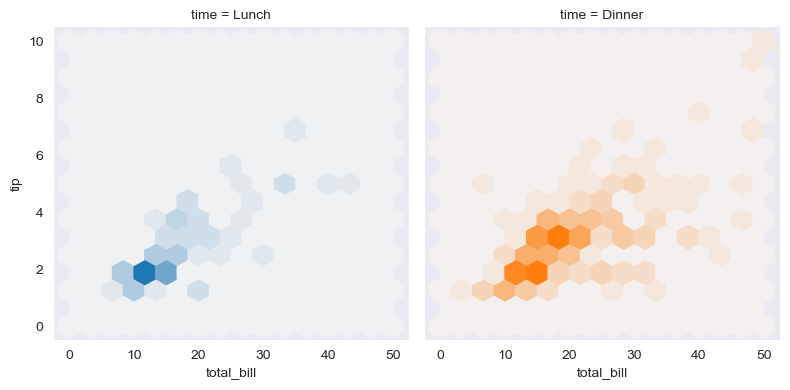

In [7]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);